In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import random
import timeit
import math



# Exploring Simulations and Probability


## Author: Viktor Nikolov

### Abstract

This notebook is a basic introduction to simulations and probability using the Monte Carlo method. Topics that have been covered are The Monty Hall problem and it's extension Monty's Revenge, Monte Carlo Integration and Trapezoid Rule Integration. 
For all the examples there are simulations in Python.

### Introduction to Simulations

Simulations are a comprehensive way of studying systems. Using simulations we can imitate real world processes to find out more about how they work. Simulations are an irreplaceable tool in science and so they should be studied, used and improved upon.

### The Monty Hall Problem

#### Introduction to the problem and some history 

An example in which we can use a simulation to help us solve a problem is the Monty Hall problem. The Monty Hall problem is a famous math problem which was based on the game show "Let's Make a Deal" with its original host Monty Hall.
* It's good to note that the **Monty Hall problem** wasn't exactly based on the game show but it was actually created by Marilyn vos Savant who proposed the problem with a slight deviation from the original game show and offered a solution but was widely rejected even by people with Ph.D's in math even though her answer was later proven correct. This turned the problem into a wide debate and actually made it so famous. Here is [a link](https://www.youtube.com/watch?v=c1BSkquWkDo&list=PLe8k-da-Hthrdup5TBgoSH4YKyoJ2OLfk&index=3&t=0s) to a short interview with Monty Hall about the problem if you are interested to find out more.

#### The rules of the problem

The best way to understand the problem is to imagine that you are there. So imagine that you are on the game show and that you are given three doors to choose from. Behind one of the three doors is a car and behind the other two are goats. You don't know where the car is but the host of the game knows. Now we pick a door. The problem is symmetrical so it doesn't really matter which door we choose first but let's pick door `one`. After that the host opens another door revealing a goat. The host will always open a door with a goat behind it. Let's asume he opened door `two`. Finally you would be offered a choice. Switch with the other unopened door in this case door `three` or stay with your original choice which in this case is door `one`. The question is: **Is it beneficial to switch?**

#### Asumptions that will help us understand the problem

1. One door has a car, two doors have goats.
2. Monty (the host) **knows where the car is**.
3. Monty will **always** open a goat door.
4. If Monty has a choice he picks with **equal probabilities**. For example we pick randomly the door that has the car behind it now Monty can choose between the other two doors with a probability of $\frac{1}{2}$.
5. We want the car!!!

#### Solving the problem using the Law of Total Probability (LOTP)

I know that I probably could have used something like Bayes' theorem to solve the problem but I would like to make an attempt with a different approach. Before I actually get to **LOTP** however I would like to show the problem using tables and I know that it would have been much better using tree diagrams but this is what I was able to come up with.

For simplicity and not having to draw many tables let's assume that we chose door `1`. The row `choose` will represent the door that we chose. `P1` will be the probability of choosing the door with the car which will allways be equal to $\frac{1}{3}$ because we have three doors to choose from and they are all equally likely to be chosen.`car door` will be the door with the car. `P2` will be the probability of Monty opening a door with a goat. `Monty door` will be the door that Monty chose to open or had to open because he **had no other choice**. For example Monty had a choice to open **door 2** or **door 3** when the car was behind **door 1** and so **P2** for that is $\frac{1}{2}$ but had no choice when the car was behind door 2 and 3 and so **P2** for that is 1.
 

| choose 	|  P1  	| car door 	|  P2  	| Monty door 	|
|:------:	|:---:	|:--------:	|:---:	|:----------:	|
|    1   	| 1/3 	|     1    	| 1/2 	|      2     	|
|    1   	| 1/3 	|     1    	| 1/2 	|      3     	|
|    1   	| 1/3 	|     2    	|  1  	|      3     	|
|    1   	| 1/3 	|     3    	|  1  	|      2     	|


Now let's suppose that Monty chose to open **door 2**. In that case we can see in the table above that only the first and last row lead to Monty opening **door 2** which makes the other two rows irrelevant. What we did hear is called conditional probability. We conditioned on opening **door 2** and deleted all other possible outcomes. Have in mind that the Monty Hall problem is symmetrical. What that means is that even if we make all possible tables no matter what door we condition on we will still get the same result. Notice that now we are left with two cases the first is when `car door` is 1 or that is the case where we don't switch and the other when `car door` is 3 or the case where we do switch. We can also look on the two rows as paths from `choose` to `Monty door` and the probability of them occuring will be the product of `P1` and `P2`. What we get from that is that the probability of the first row occuring is $\frac{1}{6}$ and the probability of the second row $\frac{1}{3}$. Even now we can see that it's more likely to win if we switch but this is not yet the final answer. When we add both probabilities we have to get an answer that is equal to $| 1 |$ but we don't that is because by deleting some of the rows from the upper table we removed some of the possible events and disordered (distabilized) the final probability so now we must renormalize it. We can do that by multiplying both outcome probabilities by some constant so when added they be equal to $| 1 |$. And we get our final answers of $\frac{1}{3}$ when not switching and $\frac{2}{3}$ when doing the switch.

| choose 	|  P1  	| car door 	|  P2  	| Monty door 	|
|:------:	|:---:	|:--------:	|:---:	|:----------:	|
|    1   	| 1/3 	|     1    	| 1/2 	|      2     	|
|    1   	| 1/3 	|     3    	|  1  	|      2     	|

$$\Downarrow$$

$$\frac{1}{3} \times \frac{1}{2}  = \frac{1}{6}\times 2 = \frac{1}{3}$$

$$\frac{1}{3} \times 1 = \frac{1}{3} \times 2 = \frac{2}{3}$$ 

$$\frac{1}{3} + \frac{2}{3} = 1 $$

Now let's have a look at the other aproach but before actually using **LOTP** it's good to introduce some notation.

$$ S: \text{succseed (assuming \ switch)} $$

$$ D_j: \text{Door $j$ has car $(j \in ${1, 2, 3}$)$ } $$

$$ P(S): \text{ the probability that $S$ occures} $$

$$ P(S\mid D_j): \text{the proability that $S$ occures given that $D_j$ occures} $$

$$ P(S\cap D_j): \text{both probabilities intersect each other} $$

$$ P(S\mid D_j)\times P(S) = P(S\cap D_j) $$

When using **LOTP** the key step is what to condition on. We should first ask ourselves what we wish we knew. In our case we definitely wished we knew where the car was. So we should just condition on it and act as if we did know that. Have in mind that we chose **door 1** so our assumptions will be based on that. 

$$P(S) = P(S\cap D_1)+\ldots+P(S\cap D_j)$$

$$P(S) = P(S\mid D_1)\times P(D_1) + P(S\mid D_2)\times P(D_2) + P(S\mid D_3)\times P(D_3) $$

$$P(S) = P(S\mid D_1)\times \frac{1}{3} + P(S\mid D_2)\times \frac{1}{3} + P(S\mid D_3)\times \frac{1}{3} $$

$$P(S) = 0 + \frac{1}{3} + \frac{1}{3} = \frac{2}{3} $$

* Just to be clear in the last eqaution we have a zero because $P(S\mid D_1)$ is imposible to occur because we chose **door 1**. 
* Try it again but this time assume that you don't switch.

#### Solving the problem using simulations

Finally we have reached the point of using a simulation which is ofcourse the best approach for this problem. The first simulation simulates the case where we don't switch and it does it 2000 times. In the graph we can see that the begining is very chaotic that's because the number of actual attempts that are happening in the second `for loop` increaes depending on the first `for loop`. In the beginnig we don't make that many attempts so our result is approximately **1** or **0** but the more attempts we make we start to see that the probability of winning get's closer and closer to $\frac{1}{3}$. The `np.mean` function works by taking a list of numbers and divide's their sum by their count but because we are using **1** and **0** to show when we win or we lose what we are doing is actually summing all the wins and dividing them by the total amount of plays which gives us the probability of wining. Remember the definition of probability is the sum of the desired outcomes divided by the number of outcomes. So simply said **mean euqals probability of winning** in this case.
* If you haven't guessed it yet the change that we observe in the graph has something to do with the **law of large numbers** here is a [link](https://www.youtube.com/watch?v=VpuN8vCQ--M&t=1s) to a video from khan academy if you want to learn more.


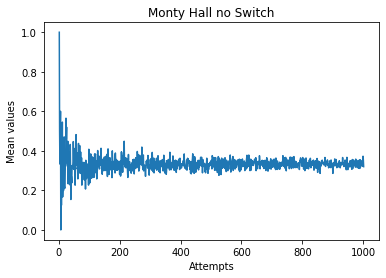

Mean : 0.334


In [3]:
def plot_monty_hall_noswitch(attempts):
    meanScores = []
    count = []
    
    for i in range(2, attempts+2):
        
        scores = []  
        
        for j in range(1, i):
            
            prize = random.randint(0, 3)
            guess = random.randint(0, 3)    
            if prize == guess:
                scores.append(1)  
            else:
                scores.append(0)
                
        meanScores.append(np.mean(scores))    
        count.append(i)
      
    plt.plot(count, meanScores)
    plt.xlabel("Attempts")
    plt.ylabel("Mean values")
    plt.title("Monty Hall no Switch")
    plt.show()
    print("Mean : " + str(round(np.mean(meanScores),3)))
    
    
    
plot_monty_hall_noswitch(1000)


The second simulation is the one where we do switch and we can see when looking at the plot that the mean value is 0.66 which is about $\frac{2}{3}$. To actually do the switch we remove our guess from the possible three doors and check if the prize is in any one of the two that are left if it is we change our guess to that door and we win. If not that means that our guess was the prize so we pick a door at random, we switch to it and we lose.

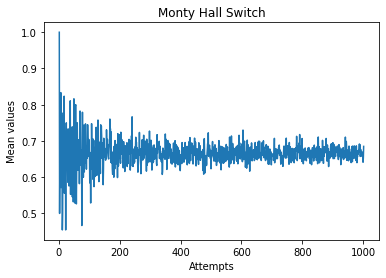

Mean: 0.666


In [4]:
def plot_monty_hall_switch(attempts):
    meanScores = []
    count = []

    for i in range(2, attempts+2):
        scores = []   
        for j in range(1, i):
            prize = random.randint(0, 3)
            guess = random.randint(0, 3)  
            
            newGuesses = [0,1,2]
            newGuesses.remove(guess)
            if newGuesses[0] == prize:
                del newGuesses[1]
            elif newGuesses[1] == prize:
                del newGuesses[0] 
            else:
                del newGuesses[random.randint(0, len(newGuesses))]
            guess = newGuesses[0]
        
            if prize == guess:
                scores.append(1)
            else:
                scores.append(0)
               
        meanScores.append(np.mean(scores))    
        count.append(i)
    plt.plot(count, meanScores)
    plt.xlabel("Attempts")
    plt.ylabel("Mean values")
    plt.title("Monty Hall Switch")
    plt.show()
    print("Mean: " + str(round(np.mean(meanScores),3)))
    


plot_monty_hall_switch(1000)

### Monty Hall's Revenge 

Monty Hall's revenge or attack of the goats as it is also called is an extension to the Monty Hall problem introduced by Dr. James Grime here is a [link](https://www.youtube.com/watch?v=fYPXYzymUqI) to his explanation if you are interested. In this version of the game after we pick a door Monty Hall flips a coin. If we pick the door with the prize nothing changes and we are still offered the switch. If we pick a door with a goat and Monty trows heads **(H)** still nothing changes. If Monty trows tails **(T)** he opens our door and we lose. 


In the table below we can see six possible cases. Let's assume again that we choose **door 1**. In the first two cases our door is the door with the car so normaly we win if we stick and we lose if we switch. The third case Monty trows **H** so it's a normal case the forth however Monty trows **T**, he opens our door and we lose. The fifth case is normal and we lose again on the sixt case. As we can see in the table what this version of the game does is to make both the choices stick or switch to have equal probabilities of $\frac{1}{3}$ and turn the game in to a trully random one.
 

| 1   	| 2   	| 3   	| Coin 	| Stick 	| Switch 	|
|-----	|-----	|-----	|------	|-------	|--------	|
| Car 	|     	|     	|   H  	|  Win  	|  Lose  	|
| Car 	|     	|     	|   T  	|  Win  	|  Lose  	|
|     	| Car 	|     	|   H  	|  Lose 	|   Win  	|
|     	| Car 	|     	|   T  	|  Lose 	|  Lose  	|
|     	|     	| Car 	|   H  	|  Lose 	|   Win  	|
|     	|     	| Car 	|   T  	|  Lose 	|  Lose  	|

In these simulations we add a new random variable `coin_toss` to represent the coin toss. As expected we see no difference in the first simulation. 

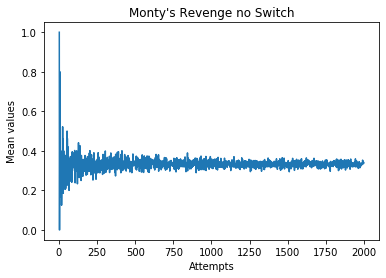

Mean: 0.333


In [5]:
def monty_hall_revenge_noswitch(attempts):
    meanScores = []
    count = []
    for i in range(2, 2000):
        scores = []   
        for j in range(1, i):
            prize = random.randint(0, 3)
            guess = random.randint(0, 3)    
            coin_toss = random.randint(0,2) # Tails == 1, Heads == 0

            if prize == guess:
                scores.append(1)
            elif prize != guess:
                if coin_toss == 0:
                    scores.append(0)
                elif coin_toss == 1:
                    scores.append(0)
        meanScores.append(np.mean(scores))    
        count.append(i)
    plt.plot(count, meanScores)
    plt.xlabel("Attempts")
    plt.ylabel("Mean values")
    plt.title("Monty's Revenge no Switch")
    plt.show()
    print("Mean: " + str(round(np.mean(meanScores),3)))
    
monty_hall_revenge_noswitch(1000)

In the second simulation we only check if the `coin_toss` is **(T)** because nothing changes if it's **(H)**. We can see in the graph that it worked. Even though we are doing the switch we are getting only a $\frac{1}{3}$ chance of winning.

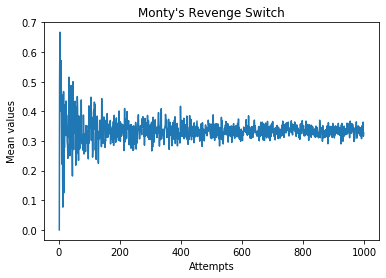

Mean: 0.334


In [6]:
def monty_hall_revenge_switch(attempts):
    meanScores = []
    count = []
    for i in range(2, attempts):
        scores = []   
        for j in range(1, i):
            prize = random.randint(0, 3)
            guess = random.randint(0, 3) 
            coin_toss = random.randint(0,2)
            if coin_toss == 1:  # Tails == 1, Heads == 0
                if guess != prize:
                    scores.append(0)
                    continue
             
            newGuesses = [0,1,2]
            newGuesses.remove(guess)
            if newGuesses[0] == prize:
                del newGuesses[1]
            elif newGuesses[1] == prize:
                del newGuesses[0] 
            else:
                del newGuesses[random.randint(0, len(newGuesses))]
            guess = newGuesses[0]
        
            if prize == guess:
                scores.append(1)
            else:
                scores.append(0)
               
        meanScores.append(np.mean(scores))    
        count.append(i)
    plt.plot(count, meanScores)
    plt.xlabel("Attempts")
    plt.ylabel("Mean values")
    plt.title("Monty's Revenge Switch")
    plt.show()
    print("Mean: " + str(round(np.mean(meanScores),3)))
    

monty_hall_revenge_switch(1000)
    

### The Monte Carlo Method

The Monte Carlo method (**MC**) is a broad class of computational algorithms that use randomness to solve problems that can have a probabilistic interpretation. It has many uses from science to business applications. One of it's applications that we will have a closer look at is computing definite integrals. We will also look at the trapezoid rule which is a deterministic way of solving integrals and we will try to compare both methods of integration. It is known that **MC** integration is much more effective when computing multidimensional integrals compared to the standard methods of integration but for these examples we will only look at one dimensional integrals.

#### Monte Carlo Integration

Monte Carlo integration is a technique for numerical integration using random numbers. The basic idea is taking a large amount of random numbers uniformly distributed between a sample space, running those numbers through a function and summing them or collecting them in an array and then taking the average of that sum or array. We can see that expressed symbolically below. A final thing that we should do is multiply the average by $(b-a)$ which are the boundaries of the integral. The result that we get in the end is an approximation of the exact value of the integral so there will be an error.
$$\lim_{n\to\infty} \frac{b-a}{n} \sum_{n=1}^{n} f(X_i) = \int_a^b f(x) dx$$

#### Monte Carlo Integration Simulations

In the code below I have defined a function `mc_integrate` which will execute the **MC** integration algorithm and measure the error of the approximation. Integration is finding the area beneath the graph of a function that's why the values of `answer` will be stored in `areas`. Also I have tryed to vectorize the code as much as I can because **MC** integration is usualy much slower when computing onedimensional integrals compared to other methods of integration like the trapezoid rule and much much slower when not vectorized.

In [7]:
def mc_integrate(f,a,b,N,exact,title):
    
    areas = np.array(np.zeros(N)) # 

    for i in range(N):
        
        x_rand_arr = np.array(np.random.uniform(a,b,N)) # Making the array of random numbers
        
        integral = f(x_rand_arr) 
        
        answer = (b-a)/float(N) * integral.sum() # MC integration algorithm
        areas[i] = answer
    
    plt.hist(areas, bins=30, ec ='black')
    plt.title(title)
    plt.show()
    
    error = np.abs(np.mean(areas) - exact) # Measunring the error between the exact value and the approximation
    
    print("M.C. Integral evaluation: " + str(np.mean(areas)))
    print("Exact value: " + str(exact))
    print("Error: " + str(error))
    

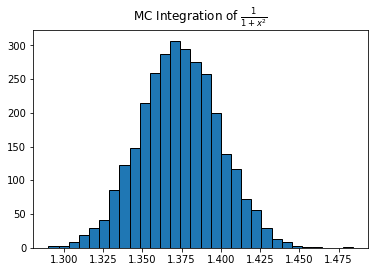

M.C. Integral evaluation: 1.373761618942526
Exact value: 1.373400766945016
Error: 0.0003608519975100144


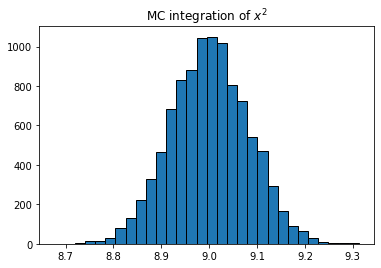

M.C. Integral evaluation: 9.000730828535357
Exact value: 9
Error: 0.0007308285353566646


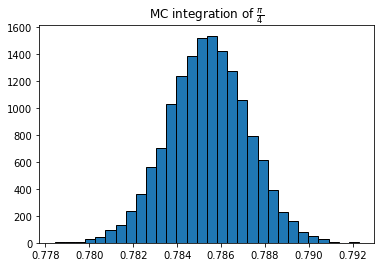

M.C. Integral evaluation: 0.785388095055591
Exact value: 0.7853981633974483
Error: 1.0068341857238927e-05


In [8]:
mc_integrate(lambda x: 1/(1 + x**2), 0, 5, 3000, np.arctan(5),r"MC Integration of $\frac{1}{1+x^2}$")
mc_integrate(lambda x: x**2, 0, 3, 10000, 9, r"MC integration of $x^2$") 
mc_integrate(lambda x: np.sqrt(1-x**2), 0, 1, 15000, np.pi/4, r"MC integration of $\frac{\pi}{4}$")

What we can see from the graphs above is that increasing the amount of random values will usually give us a better approximation at the cost of execution time. But because the values are random we will always get a different result and we will always have some kind of error.

#### Trapezoid Rule

The trapezoidal rule as the **MC** integration is a technique for approximating definite integrals. Basically what it does is to split the area under the graph in to equaly spaced intervals in the form of trapezoids, calculaiting the area of each trapezoide and summing them. We can see that symbolically expressed bellow.

$$\text{Area of trapezoid: } h  \times \frac{a+b}{2}  $$

$$\int_a^b f(x) dx \thickapprox (b-a) \times \frac{f(a)+f(b)}{2}$$

$$\int_a^b f(x) dx \thickapprox \sum_{k=1}^N \times \frac{f(x_{k-1}) + f(x_k)}{2} \Delta x_k$$

$$ \Delta x_k = \Delta x = \frac{(b-a)}{N}$$

In [9]:
def trapz(f,a,b,N,exact,title):
    
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x) 
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N # Delta x
    T = (dx/2) * np.sum(y_right + y_left) # This is basicly our trapezoid formula but for all intervals
    # X and Y values for plotting y=f(x)
    X = np.linspace(a,b,N+1)
    Y = f(X)
    plt.plot(X,Y)

    for i in range(N):
        
        xs = [x[i],x[i],x[i+1],x[i+1]]
        ys = [0,f(x[i]),f(x[i+1]),0]
        plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

    plt.title(title)
    plt.show()
    error = np.abs(exact - T)
    print("Trapezoid integration: " + str(T))
    print("Exact value: " + str(exact))
    print("Error:" + str(error))

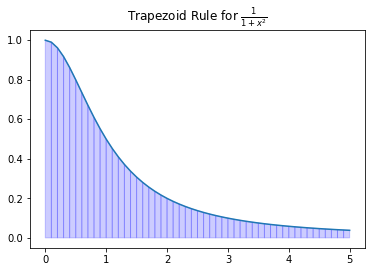

Trapezoid integration: 1.3733884404039527
Exact value: 1.373400766945016
Error:1.232654106320119e-05


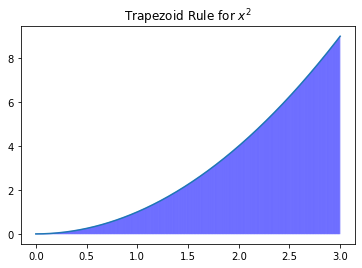

Trapezoid integration: 9.000017999999999
Exact value: 9
Error:1.799999999896329e-05


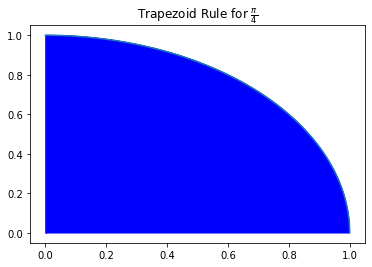

Trapezoid integration: 0.7853973318576453
Exact value: 0.7853981633974483
Error:8.31539803014536e-07


In [10]:
trapz(lambda x: 1/(1 + x**2), 0, 5, 50, np.arctan(5),r"Trapezoid Rule for $\frac{1}{1+x^2}$")
trapz(lambda x: x**2, 0, 3, 500, 9,r"Trapezoid Rule for $x^2$")
trapz(lambda x: np.sqrt(1-x**2), 0, 1, 5000, np.pi/4,r"Trapezoid Rule for $\frac{\pi}{4}$")

As we can see increasing the subintervals leads to more accurate results. As expected the accuracy of the trapezoid rule is much better than that of the **MC** integration but this is just for one dimensional integrals. Increasing the dimensions will lead to the trapezoid rule and others like it (Riman's Rule , Simpson's Rule) to become computationally expensive while the **MC** integration can be used for hundreds of dimensions and it will be very efficient.

#### Timing both methods 

Here I will use `timit.timit` to time both methods execution time. Im using decorators so I can pass my functions to `timeit.timeit`. It's a very long way of timing a function but this is what I was able to come up with.

In [11]:
def mc_integrate_time_test(f,a,b,N): # MC function 
    
    areas = np.array(np.zeros(N))

    for i in range(N):
        
        x_rand_arr = np.array(np.random.uniform(a,b,N))
        
        integral = f(x_rand_arr)
        
        answer = (b-a)/float(N) * integral.sum()
        areas[i] = answer
    return np.mean(areas)

In [12]:
def wrapper_mc(func, *args, **kwargs): # Decorator
    def wrapped_mc():
        return func(*args, **kwargs)
    return wrapped_mc

wrapped_mc = wrapper_mc(mc_integrate_time_test,lambda x: 1/(1 + x**2), 0, 5, 1000)
print("MC integration execute time: " + str(timeit.timeit(wrapped_mc,number=1)))

MC integration execute time: 0.03910460000000171


In [13]:
def trapz_time_test(f,a,b,N): # Trapezoid rule function
    
    x = np.linspace(a,b,N+1)
    y = f(x)
    y_right = y[1:] 
    y_left = y[:-1] 
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [14]:
def wrapper_trapz(func, *args, **kwargs): # Decorator
    def wrapped_trapz():
        return func(*args, **kwargs)
    return wrapped_trapz

wrapped_trapz = wrapper_trapz(trapz_time_test, lambda x: 1/(1 + x**2), 0, 5, 1000)
print("Trapezoid rule execute time: " + str(timeit.timeit(wrapped_trapz,number=1)))

Trapezoid rule execute time: 0.00017250000000501586


From this we can see that the trapezodial rule is about 100 times faster than the **MC** integration but as I stated before it will quickly become inefficient once we increase the dimensions.

###  Conclusion

This notebook gave a short introduction to Monte Carlo Integration and it tried to give a more detailed explanation of the **Monty Hall** problem with the intention of developing a better understanding for the problem. There are much improvements that can be made to this notebook in future work. Probability concepts can be discussed more thoroughly. For example the **Law of Large Numbers** and it's versions the **strong law** and the **weak law**. From there we can make a connection to **Monte Carlo Integration** and why it actually workes. Examples with multidimensional integrals can be added. A real life system using the **Monte Carlo method** can be made. For example **Monte Carlo Tree Search** and some kind of game using that algorithm to predict the next best move.

### References

1. [Harvard Univerity YouTube](https://www.youtube.com/watch?v=fDcjhAKuhqQ)
2. [DapperDino YouTube](https://www.youtube.com/watch?v=G0EjLq4fMOA&t=486s)
3. [singingbanana YouTube](https://www.youtube.com/watch?v=fYPXYzymUqI)
4. [Monte Carlo Integration.pdf](http://math.uni.lu/eml/projects/reports/MonteCarlo.pdf)
5. https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/#definition
6. https://en.wikipedia.org/wiki/Monte_Carlo_integration
7. https://en.wikipedia.org/wiki/Trapezoidal_rule
8. [Andrew Dotson YouTube](https://www.youtube.com/watch?v=WAf0rqwAvgg&t=81s)
9. https://www.pythoncentral.io/time-a-python-function/
10. [Jarad Niemy YouTube](https://www.youtube.com/watch?v=MKnjsqYVG4Y&t=1s)
